In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Fashion MNIST

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Create model
input_shape = (28, 28, 1)
n_classes = 10

input = keras.Input(shape=input_shape)
x = keras.layers.Conv2D(16, 5, padding='same', activation='relu')(input)
x = keras.layers.Conv2D(32, 5, strides=2, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.Conv2D(128, 3, padding='same', activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Conv2D(256, 3, padding='valid', activation='relu')(x)
x = keras.layers.MaxPool2D()(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal')(x)
x = keras.layers.Dense(256, activation='sigmoid', kernel_initializer='he_normal')(x)
x = keras.layers.Dense(n_classes, activation='softmax', kernel_initializer='he_normal')(x)

model = keras.Model(inputs=[input], outputs=[x])

model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 5, 5, 256)         2951

In [ ]:
history = model.fit(X_train, Y_train, batch_size=256, epochs=32, validation_split=0.2)
model.evaluate(X_test, Y_test, batch_size=256, verbose=0)

Epoch 1/32
188/188 [==============================] - 4s 20ms/step - loss: 1.0378 - accuracy: 0.6230 - val_loss: 0.4381 - val_accuracy: 0.8356
Epoch 2/32
188/188 [==============================] - 3s 18ms/step - loss: 0.4083 - accuracy: 0.8469 - val_loss: 0.3511 - val_accuracy: 0.8717
Epoch 3/32
188/188 [==============================] - 4s 19ms/step - loss: 0.3082 - accuracy: 0.8851 - val_loss: 0.3037 - val_accuracy: 0.8911
Epoch 4/32
188/188 [==============================] - 3s 18ms/step - loss: 0.2644 - accuracy: 0.9030 - val_loss: 0.2826 - val_accuracy: 0.8963
Epoch 5/32
188/188 [==============================] - 3s 18ms/step - loss: 0.2386 - accuracy: 0.9118 - val_loss: 0.2645 - val_accuracy: 0.9031
Epoch 6/32
188/188 [==============================] - 3s 18ms/step - loss: 0.2053 - accuracy: 0.9257 - val_loss: 0.2491 - val_accuracy: 0.9088
Epoch 7/32
188/188 [==============================] - 3s 18ms/step - loss: 0.1927 - accuracy: 0.9283 - val_loss: 0.2597 - val_accuracy: 0.9032

[0.5001600384712219, 0.9067000150680542]

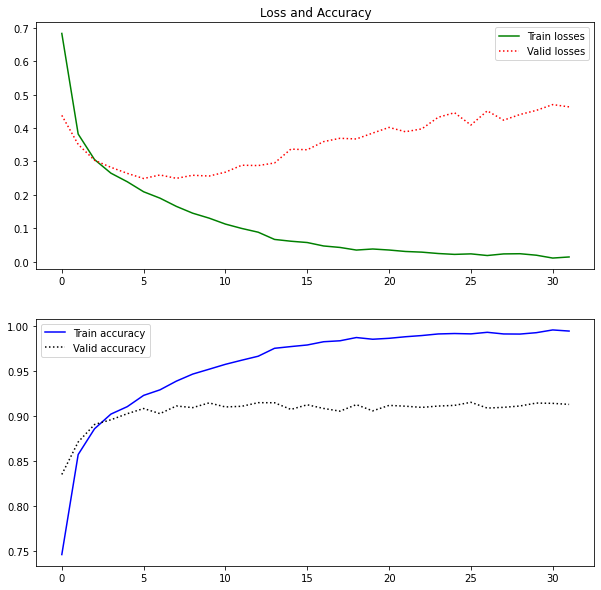

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

axes[0].set_title('Loss and Accuracy')
axes[0].plot(history.history['loss'], '-g', label='Train losses')
axes[0].plot(history.history['val_loss'], ':r', label='Valid losses')
axes[0].legend()
axes[1].plot(history.history['accuracy'], '-b', label='Train accuracy')
axes[1].plot(history.history['val_accuracy'], ':k', label='Valid accuracy')
axes[1].legend()